In [1594]:
import numpy as np
import pandas as pd
import numpy.random as npr

In [1595]:
cd C:/Project CPC152

C:\Project CPC152


In [1596]:
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Understanding the data

In [1597]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [1598]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [1599]:
iris.shape

(150, 6)

In [1600]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Cleaning Data

In [1601]:
iris.apply(lambda x: sum(x.isnull()), axis = 0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Spliting the Dataset

In [1602]:
x = iris.iloc[:, 1:6]
y = iris.iloc[:, 5]

In [1603]:
print(x.shape)


(150, 5)


In [1604]:
print(y.shape)


(150,)


In [1605]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=4)

In [1606]:
print(X_train.shape)
print(X_test.shape)

(105, 5)
(45, 5)


In [1607]:
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


In [1608]:
print(X_train1.shape)
print(X_test1.shape)

(120, 5)
(30, 5)


In [1609]:
print(y_train1.shape)
print(y_test1.shape)

(120,)
(30,)


## Change the data type from string to numeric using Encoder

In [1610]:
pd.options.mode.chained_assignment = None

In [1611]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    X_train[i] = le.fit_transform(X_train[i])
X_train.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [1612]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    X_test[i] = le.fit_transform(X_test[i])
X_test.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [1613]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    X_train1[i] = le.fit_transform(X_train1[i])
X_train1.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [1614]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    X_test1[i] = le.fit_transform(X_test1[i])
X_test1.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

## Feature Scaling

In [1615]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_test = sc_X.fit_transform(X_test)
#X_train = sc_X.fit_transform(X_train)
#X_test1 = sc_X.fit_transform(X_test1)
#X_train1 = sc_X.fit_transform(X_train1)

## Predictions

In [1616]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,26,2)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [1617]:
scores

{1: 1.0,
 3: 1.0,
 5: 1.0,
 7: 1.0,
 9: 1.0,
 11: 1.0,
 13: 1.0,
 15: 1.0,
 17: 1.0,
 19: 1.0,
 21: 1.0,
 23: 1.0,
 25: 1.0}

In [1618]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,26,2)
scores1 = {}
scores_list1 = []

for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train1,y_train1)
    y_pred1 = knn1.predict(X_test1)
    scores1[k] = metrics.accuracy_score(y_test1, y_pred1)
    scores_list1.append(metrics.accuracy_score(y_test1, y_pred1))

In [1619]:
scores1

{1: 1.0,
 3: 1.0,
 5: 1.0,
 7: 1.0,
 9: 1.0,
 11: 1.0,
 13: 1.0,
 15: 1.0,
 17: 1.0,
 19: 1.0,
 21: 1.0,
 23: 1.0,
 25: 1.0}

Text(0, 0.5, 'Testing Accuracy')

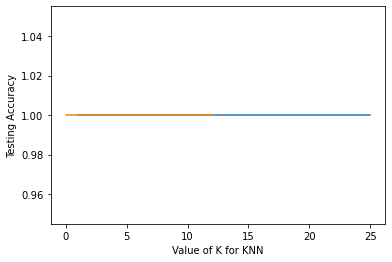

In [1620]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, scores_list, scores_list1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Experiment 1


In [1621]:
model = KNeighborsClassifier(n_neighbors=13) 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [1622]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=13)

In [1623]:
predictions = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [1624]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions, average="weighted"))
print('Precision: ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8444444444444444
Recall:  0.8444444444444444
Precision:  0.8473970473970474
Confusion matrix: 
[[21  0  0]
 [ 0  7  3]
 [ 0  4 10]]


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [1625]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=13)

In [1626]:
predictions = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [1627]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions, average="weighted"))
print('Precision: ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9555555555555556
Recall:  0.9555555555555556
Precision:  0.9555555555555556
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]



### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [1628]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=13)

In [1629]:
predictions = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [1630]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions, average="weighted"))
print('Precision: ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9777777777777777
Recall:  0.9777777777777777
Precision:  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [1631]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=13)

In [1632]:
predictions = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [1633]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test1, predictions))
print('Recall: ', recall_score(y_test1, predictions, average="weighted"))
print('Precision: ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8333333333333334
Recall:  0.8333333333333334
Precision:  0.8416666666666667
Confusion matrix: 
[[16  0  0]
 [ 0  3  2]
 [ 0  3  6]]



### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [1634]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=13)

In [1635]:
predictions = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [1636]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test1, predictions))
print('Recall: ', recall_score(y_test1, predictions, average="weighted"))
print('Precision: ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9333333333333333
Recall:  0.9333333333333333
Precision:  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [1637]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=13)

In [1638]:
predictions = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [1639]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test1, predictions))
print('Recall: ', recall_score(y_test1, predictions, average="weighted"))
print('Precision: ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)


Accuracy:  0.9666666666666667
Recall:  0.9666666666666667
Precision:  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


## Feature Scaling

In [1699]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_test = sc_X.fit_transform(X_test)
X_train = sc_X.fit_transform(X_train)
X_test1 = sc_X.fit_transform(X_test1)
X_train1 = sc_X.fit_transform(X_train1)

## Experiment 2

In [1700]:
import math
math.sqrt(len(X_train))


10.246950765959598

In [1701]:
import math
math.sqrt(len(X_train1))


10.954451150103322

In [1702]:
model = KNeighborsClassifier(n_neighbors=10, p=2, metric='euclidean') 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [1703]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

<ipython-input-1703-b1a6460553e3>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [1645]:
predictions1 = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [1646]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions1))
print('Recall: ', recall_score(y_test, predictions1, average="weighted"))
print('Precision: ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8444444444444444
Recall:  0.8444444444444444
Precision:  0.8579642579642579
Confusion matrix: 
[[21  0  0]
 [ 0  8  2]
 [ 0  5  9]]


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [1647]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [1648]:
predictions1 = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [1649]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions1))
print('Recall: ', recall_score(y_test, predictions1, average="weighted"))
print('Precision: ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9555555555555556
Recall:  0.9555555555555556
Precision:  0.9555555555555556
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]



### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [1650]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [1651]:
predictions1 = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [1652]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions1))
print('Recall: ', recall_score(y_test, predictions1, average="weighted"))
print('Precision: ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9777777777777777
Recall:  0.9777777777777777
Precision:  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [1653]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [1654]:
predictions1 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [1655]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test1, predictions1))
print('Recall: ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision: ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8333333333333334
Recall:  0.8333333333333334
Precision:  0.8666666666666667
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  4  5]]



### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [1656]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [1657]:
predictions1 = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [1658]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test1, predictions1))
print('Recall: ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision: ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9333333333333333
Recall:  0.9333333333333333
Precision:  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [1659]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [1660]:
predictions1 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [1661]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test1, predictions1))
print('Recall: ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision: ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)


Accuracy:  0.9666666666666667
Recall:  0.9666666666666667
Precision:  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


## Experiment 3
 

In [1686]:
import math
math.sqrt(len(y_test))

6.708203932499369

In [1692]:
model = KNeighborsClassifier(n_neighbors=6, p=2, metric='euclidean') 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [1693]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [1694]:
predictions2 = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [1695]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions2))
print('Recall: ', recall_score(y_test, predictions2, average="weighted"))
print('Precision: ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8444444444444444
Recall:  0.8444444444444444
Precision:  0.8579642579642579
Confusion matrix: 
[[21  0  0]
 [ 0  8  2]
 [ 0  5  9]]


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [1696]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [1697]:
predictions2 = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [1698]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions2))
print('Recall: ', recall_score(y_test, predictions2, average="weighted"))
print('Precision: ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9555555555555556
Recall:  0.9555555555555556
Precision:  0.9555555555555556
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]



### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [1670]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [1671]:
predictions2 = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [1672]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions2))
print('Recall: ', recall_score(y_test, predictions2, average="weighted"))
print('Precision: ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9777777777777777
Recall:  0.9777777777777777
Precision:  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [1673]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [1674]:
predictions2 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [1675]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test1, predictions2))
print('Recall: ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision: ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9
Recall:  0.9
Precision:  0.9375
Confusion matrix: 
[[15  1  0]
 [ 0  5  0]
 [ 0  2  7]]



### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [1676]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [1677]:
predictions2 = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [1678]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test1, predictions2))
print('Recall: ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision: ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9666666666666667
Recall:  0.9666666666666667
Precision:  0.9722222222222222
Confusion matrix: 
[[16  0  0]
 [ 0  5  0]
 [ 0  1  8]]



### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [1679]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [1680]:
predictions2 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [1681]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test1, predictions2))
print('Recall: ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision: ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9666666666666667
Recall:  0.9666666666666667
Precision:  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
